In [1]:
import torch
import numpy as np
from numpy import cov
from numpy import trace
from numpy import iscomplexobj
from scipy.linalg import sqrtm
import matplotlib.pyplot as plt

# FID score

In [2]:
def eval_statistic(list):

    mean_tot = []
    std_tot = []
    elem = []
    elem_tot = []

    for i in range(len(list[0])):
        elem = []
        for row in list:
            elem.append(row[i])  
        elem_tot.append(np.array(elem))
        mean_tot.append(np.mean(elem))
        std_tot.append(np.std(elem))

    return mean_tot, std_tot, elem_tot#, std_tot  

## Linear GAN

In [3]:
real = torch.load('torch_results/GAN/GAN_linear/20221208-211734/real.pt')
synthetic = torch.load('torch_results/GAN/GAN_linear/20221208-211734/synthetic.pt')
fid_mean = torch.load('torch_results/GAN/GAN_linear/20221208-211734/fid.pt')
loss_g = torch.load('torch_results/GAN/GAN_linear/20221208-211734/gen_loss.pt')
loss_d = torch.load('torch_results/GAN/GAN_linear/20221208-211734/disc_loss.pt')

_, _, elem_tot = eval_statistic(fid_mean)

In [4]:
# QGAN
q_synthetic = torch.load('torch_results/QGAN/QGAN_linear/20221208-212227/synthetic.pt')
q_fid_mean = torch.load('torch_results/QGAN/QGAN_linear/20221208-212227/fid.pt')
q_loss_g = torch.load('torch_results/QGAN/QGAN_linear/20221208-212227/gen_loss.pt')
q_loss_d = torch.load('torch_results/QGAN/QGAN_linear/20221208-212227/disc_loss.pt')

_, _, q_elem_tot = eval_statistic(q_fid_mean)

## Conv GAN

In [5]:
real = torch.load('torch_results/GAN/GAN_conv/20221208-211631/real.pt')
synthetic = torch.load('torch_results/GAN/GAN_conv/20221208-211631/synthetic.pt')
fid_mean = torch.load('torch_results/GAN/GAN_conv/20221208-211631/fid.pt')
conv_loss_g = torch.load('torch_results/GAN/GAN_conv/20221208-211631/gen_loss.pt')
conv_loss_d = torch.load('torch_results/GAN/GAN_conv/20221208-211631/disc_loss.pt')

_, _, conv_elem_tot = eval_statistic(fid_mean)

In [6]:
q_synthetic = torch.load('torch_results/QGAN/QGAN_conv/20221208-195747/synthetic.pt')
q_fid_mean = torch.load('torch_results/QGAN/QGAN_conv/20221208-195747/fid.pt')
q_conv_loss_g = torch.load('torch_results/QGAN/QGAN_conv/20221208-195747/gen_loss.pt')
q_conv_loss_d = torch.load('torch_results/QGAN/QGAN_conv/20221208-195747/disc_loss.pt')

_, _, q_conv_elem_tot = eval_statistic(q_fid_mean)

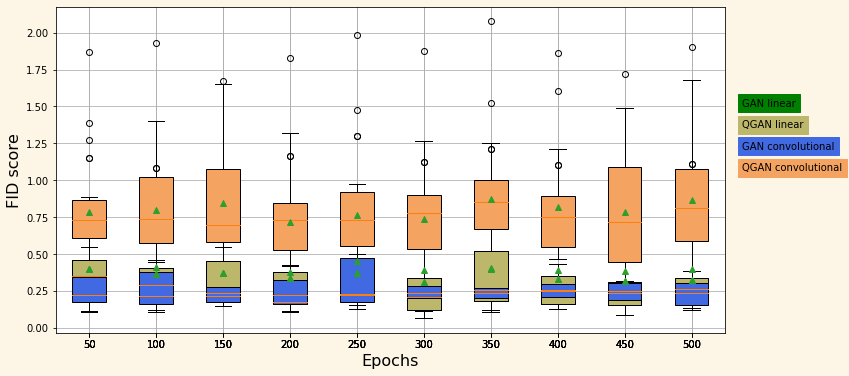

In [7]:
fig, ax = plt.subplots(figsize=(12, 6), facecolor='oldlace')
boxes = ax.boxplot(elem_tot, patch_artist=True, showmeans = True, labels = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500])
for box in boxes["boxes"]:
    box.set(facecolor = "green")
q_boxes = ax.boxplot(elem_tot, patch_artist=True, showmeans = True, labels = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500])
for box in q_boxes["boxes"]:
    box.set(facecolor = "darkkhaki")
conv_boxes = ax.boxplot(conv_elem_tot, patch_artist=True, showmeans = True, labels = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500])
for box in conv_boxes["boxes"]:
    box.set(facecolor = "royalblue")
q_conv_boxes = ax.boxplot(q_conv_elem_tot, patch_artist=True, showmeans = True, labels = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500])
for box in q_conv_boxes["boxes"]:
    box.set(facecolor = "sandybrown")

fig.text(0.92, 0.65, f'GAN linear', backgroundcolor='green', color='black', weight='roman')
fig.text(0.92, 0.6, f'QGAN linear', backgroundcolor='darkkhaki', color='black', weight='roman')
fig.text(0.92, 0.55, f'GAN convolutional', backgroundcolor='royalblue', color='black', weight='roman')
fig.text(0.92, 0.5, f'QGAN convolutional', backgroundcolor='sandybrown', color='black', weight='roman')

ax.set_xlabel('Epochs', fontsize=16)
ax.set_ylabel('FID score', fontsize=16)
plt.grid()
plt.show()

# Loss Plots

In [8]:
loss_g_mean, _, _ = eval_statistic(loss_g)
loss_d_mean, _, _ = eval_statistic(loss_d)
q_loss_g_mean, _, _ = eval_statistic(q_loss_g)
q_loss_d_mean, _, _ = eval_statistic(q_loss_d)
conv_loss_g_mean, _, _ = eval_statistic(conv_loss_g)
conv_loss_d_mean, _, _ = eval_statistic(conv_loss_d)
q_conv_loss_g_mean, _, _ = eval_statistic(q_conv_loss_g)
q_conv_loss_d_mean, _, _ = eval_statistic(q_conv_loss_d)

## Linear GAN

No handles with labels found to put in legend.


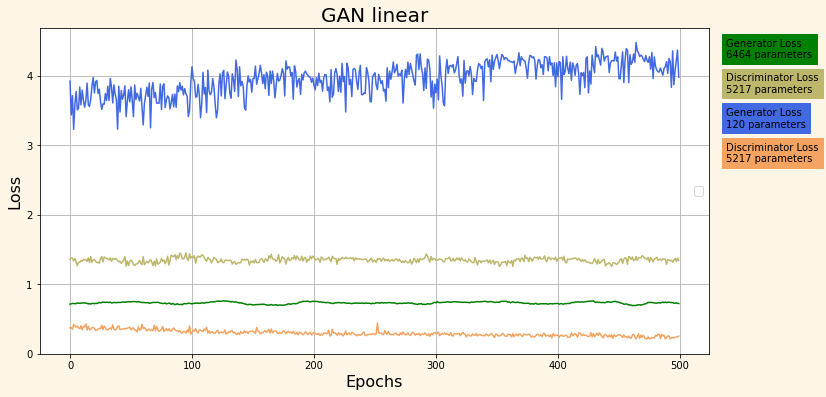

In [9]:
fig, ax = plt.subplots(figsize=(12, 6), facecolor='oldlace')
ax.plot(np.arange(len(loss_g_mean)), loss_g_mean, color='green')
ax.plot(np.arange(len(loss_d_mean)), loss_d_mean, color='darkkhaki')
ax.plot(np.arange(len(q_loss_g_mean)), q_loss_g_mean, color='royalblue')
ax.plot(np.arange(len(q_loss_d_mean)), q_loss_d_mean, color='sandybrown')
#ax.plot(np.arange(len(conv_loss_g_mean)), conv_loss_g_mean, color='violet')
#ax.plot(np.arange(len(conv_loss_d_mean)), conv_loss_d_mean, color='mediumspringgreen')
# ax.plot(np.arange(len(q_conv_loss_g_mean)), q_conv_loss_g_mean, color='firebrick')
# ax.plot(np.arange(len(q_conv_loss_d_mean)), q_conv_loss_d_mean, color='olivedrab')
fig.text(0.92, 0.81, f'Generator Loss\n6464 parameters', backgroundcolor='green', color='black', weight='roman')
fig.text(0.92, 0.73, f'Discriminator Loss\n5217 parameters', backgroundcolor='darkkhaki', color='black', weight='roman')
fig.text(0.92, 0.65, f'Generator Loss\n120 parameters', backgroundcolor='royalblue', color='black', weight='roman')
fig.text(0.92, 0.57, f'Discriminator Loss\n5217 parameters', backgroundcolor='sandybrown', color='black', weight='roman')
# fig.text(0.92, 0.49, f'Generator Loss\n84801 parameters', backgroundcolor='violet', color='black', weight='roman')
# fig.text(0.92, 0.41, f'Discriminator Loss\n51393 parameters', backgroundcolor='mediumspringgreen', color='black', weight='roman')
# fig.text(0.92, 0.33, f'Generator Loss\n120 parameters', backgroundcolor='firebrick', color='black', weight='roman')
# fig.text(0.92, 0.25, f'Discriminator Loss\n51383 parameters', backgroundcolor='olivedrab', color='black', weight='roman')

ax.set_xlabel('Epochs', fontsize=16)
ax.set_ylabel('Loss', fontsize=16)
plt.title('GAN linear', fontsize=20)
plt.legend(loc = 'right', fontsize = 12)
plt.grid()
plt.show()

## Conv GAN

In [10]:
# fig, ax = plt.subplots(figsize=(12, 6), facecolor='oldlace')
# ax.plot(np.arange(len(conv_loss_g_mean)), conv_loss_g_mean, color='violet')
# ax.plot(np.arange(len(conv_loss_d_mean)), conv_loss_d_mean, color='mediumspringgreen')
# ax.plot(np.arange(len(q_conv_loss_g_mean)), q_conv_loss_g_mean, color='firebrick')
# ax.plot(np.arange(len(q_conv_loss_d_mean)), q_conv_loss_d_mean, color='olivedrab')
# fig.text(0.92, 0.49, f'Generator Loss\n84801 parameters', backgroundcolor='violet', color='black', weight='roman')
# fig.text(0.92, 0.41, f'Discriminator Loss\n51393 parameters', backgroundcolor='mediumspringgreen', color='black', weight='roman')
# fig.text(0.92, 0.33, f'Generator Loss\n120 parameters', backgroundcolor='firebrick', color='black', weight='roman')
# fig.text(0.92, 0.25, f'Discriminator Loss\n51383 parameters', backgroundcolor='olivedrab', color='black', weight='roman')

# ax.set_xlabel('Epochs', fontsize=16)
# ax.set_ylabel('Loss', fontsize=16)
# plt.title('GAN linear', fontsize=20)
# plt.legend(loc = 'right', fontsize = 12)
# plt.grid()
# plt.show()

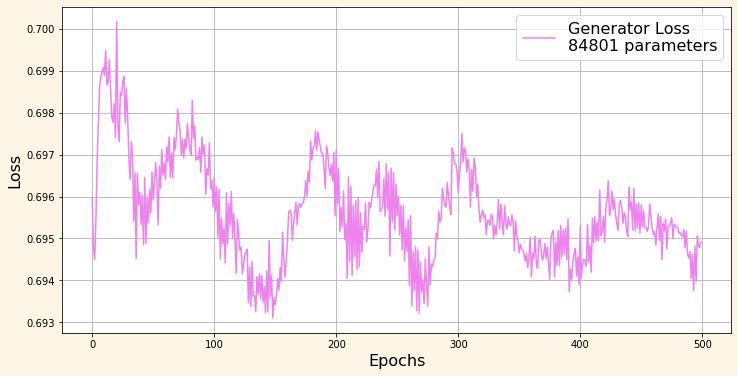

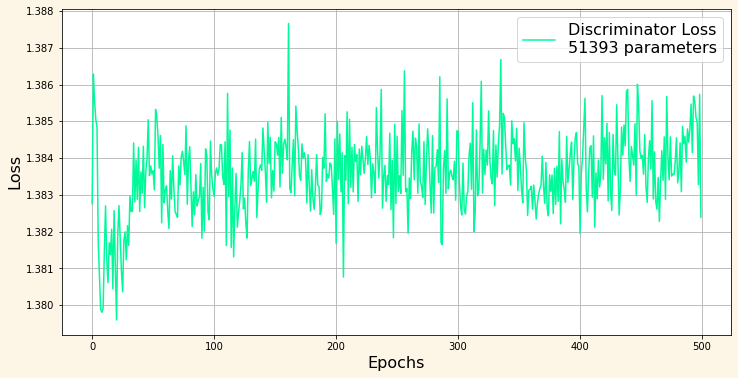

In [11]:
plt.figure(figsize=(12, 6), facecolor='oldlace')
plt.plot(np.arange(len(conv_loss_g_mean)), conv_loss_g_mean, color='violet', label = 'Generator Loss\n84801 parameters')
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.legend(loc = 'upper right', fontsize=16)
plt.grid()
plt.show()
plt.figure(figsize=(12, 6), facecolor='oldlace')
plt.plot(np.arange(len(conv_loss_d_mean)), conv_loss_d_mean, color='mediumspringgreen', label = 'Discriminator Loss\n51393 parameters')
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.legend(loc = 'upper right', fontsize=16)
plt.grid()
plt.show()

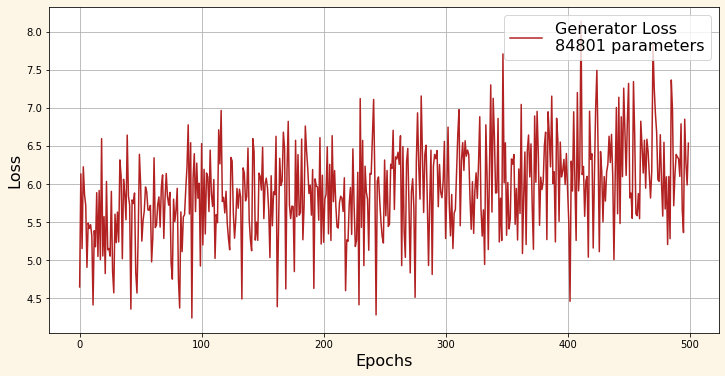

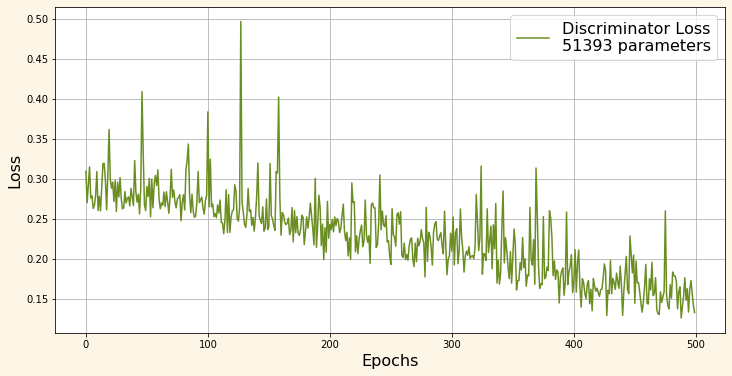

In [12]:
plt.figure(figsize=(12, 6), facecolor='oldlace')
plt.plot(np.arange(len(q_conv_loss_g_mean)), q_conv_loss_g_mean, color='firebrick', label = 'Generator Loss\n84801 parameters')
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.legend(loc = 'upper right', fontsize=16)
plt.grid()
plt.show()
plt.figure(figsize=(12, 6), facecolor='oldlace')
plt.plot(np.arange(len(q_conv_loss_d_mean)), q_conv_loss_d_mean, color='olivedrab', label = 'Discriminator Loss\n51393 parameters')
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.legend(loc = 'upper right', fontsize=16)
plt.grid()
plt.show()